Phi: -3.5259624590553402 degrees
Theta: 45.9109999999837 degrees
Launch delay: 0.6273102910027499 seconds
Precision: 0.6696368946884831 mm


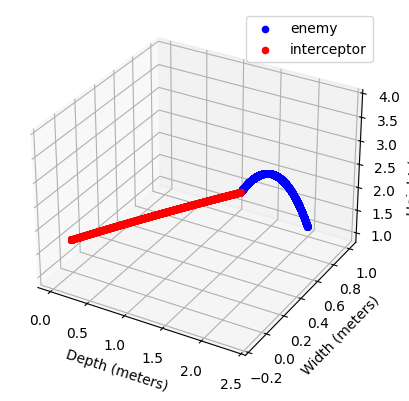

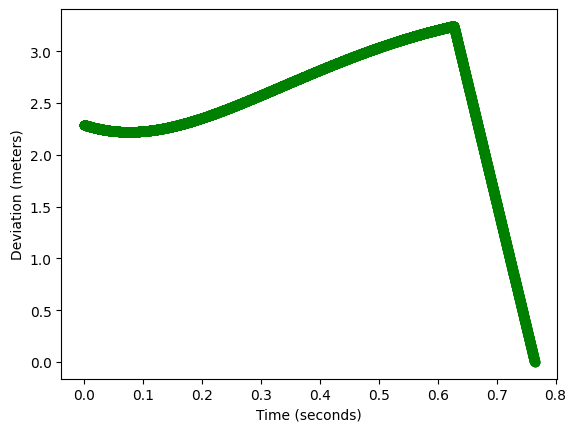

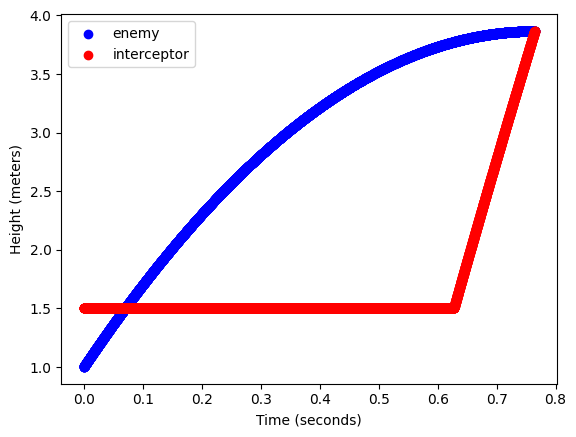

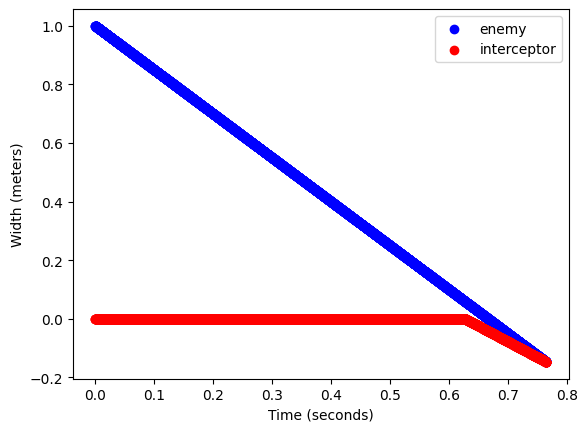

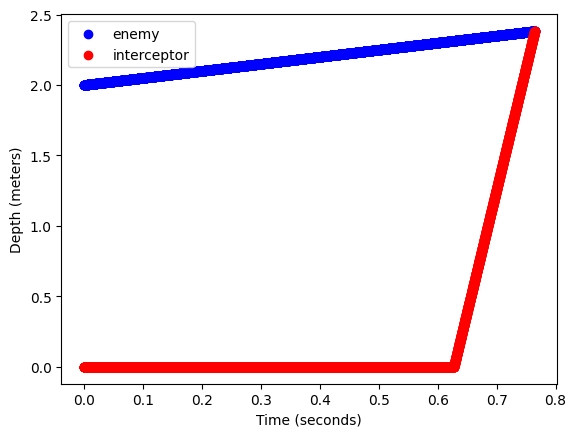

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from sympy import Symbol, solve
from math import*

# Inacurracies:

timing_error = .002 * 0 # seconds
pitch_error = 0.2 * 0 # degrees
yaw_error = 0.2 * 0 # degrees
observed_position_error = -.003 * 0 # meters
observed_velocity_error = -.003 * 0 # meters per second
muzzle_velocity_error = -.447 * .2 * 0 # meters per second

# Observed Enemy Projectile Characteristics

x_a_0 = 2
y_a_0 = 1
z_a_0 = 1

v_x_a_0 = 0.5
v_y_a_0 = 7.5
v_z_a_0 = -1.5

# Actual Enemy Projectile Characteristics

x_a_A = x_a_0 + observed_position_error
y_a_A = y_a_0 + observed_position_error
z_a_A = z_a_0 + observed_position_error

v_x_a_A = v_x_a_0 + observed_velocity_error
v_y_a_A = v_y_a_0 + observed_velocity_error
v_z_a_A = v_z_a_0 + observed_velocity_error

# Known Launcher Charachteristics

y_b_0 = 1.5
x_b_0 = 0
z_b_0 = 0

v_b_0 = 25

# Actual Launcher Charachteristics

v_b_A = v_b_0 + muzzle_velocity_error

# Gravity

g = 9.81

# Apex Calculation

T_hit = v_y_a_0/g

# Solving for Launcher Yaw

Z_hit = z_a_0 + v_z_a_0 * T_hit
X_hit = x_a_0 + v_x_a_0 * T_hit
phi = degrees(atan((Z_hit/X_hit)))
dxy = cos(radians(phi))
dz = sin(radians(phi))

phi_A = phi + yaw_error
dxy_A = cos(radians(phi_A))
dz_A = sin(radians(phi_A))

print(f'Phi: {phi} degrees')

# Solving for Launcher Pitch

Theta = 0

for degree in range(90000):

  dT = ((x_a_0 - x_b_0 + v_x_a_0*T_hit)/(v_b_0 * cos(radians(Theta))*dxy))

  Y_a = y_a_0 + (v_y_a_0**2) * (1/g - 1/(2*g))
  Y_b = y_b_0 + v_b_0 * sin(radians(Theta))*dxy*dT - (g/2)*(dT**2)

  if abs(Y_b - Y_a) < .0001:
    theta = Theta
    break

  Theta += .001

Theta_A = Theta + pitch_error

print(f'Theta: {theta} degrees')

# Solving for Launch Delay

t_launch = T_hit - ((x_a_0 - x_b_0 + v_x_a_0*T_hit)/(v_b_0 * cos(radians(theta))*dxy))

t_launch_A = t_launch + timing_error

print(f'Launch delay: {t_launch} seconds')

# Run simulation

t = 0

x_a = []
y_a = []
z_a = []

x_b = []
y_b = []
z_b = []

T = []

Deviation = []

while t <= (T_hit + .25*0):
    t += 0.0001

    t_2 = max(t - t_launch_A, 0)

    X_a = v_x_a_A * t + x_a_A
    Y_a = y_a_A + v_y_a_A * t - (g/2)*(t**2)
    Z_a = v_z_a_A * t + z_a_A

    x_a.append(X_a)
    y_a.append(Y_a)
    z_a.append(Z_a)

    X_b = (v_b_A * cos(radians(Theta_A))*dxy_A * t_2)
    Y_b = (y_b_0 + v_b_A * sin(radians(Theta_A))* dxy_A * t_2 - (g/2)*(t_2**2))
    Z_b = (v_b_A * cos(radians(Theta_A))*dz_A * t_2)

    x_b.append(X_b)
    y_b.append(Y_b)
    z_b.append(Z_b)

    T.append(t)

    Deviation.append((((X_a-X_b)**2)+((Y_a-Y_b)**2)+((Z_a-Z_b)**2))**0.5)


print(f'Precision: {1000*min(Deviation)} mm')

# Plotting

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_a, z_a, y_a, c = 'blue', label = "enemy")
ax.scatter(x_b, z_b, y_b, c = 'red', label = "interceptor")
ax.legend()
ax.set_xlabel("Depth (meters)")
ax.set_zlabel("Height (meters)")
ax.set_ylabel("Width (meters)")

plt.figure()
plt.scatter(T, Deviation, c = 'green')
plt.xlabel("Time (seconds)")
plt.ylabel("Deviation (meters)")
plt.show()

plt.figure()
plt.scatter(T, y_a, c = 'blue', label = "enemy")
plt.scatter(T, y_b, c = 'red', label = "interceptor")
plt.legend()
plt.xlabel("Time (seconds)")
plt.ylabel("Height (meters)")
plt.show()

plt.figure()
plt.scatter(T, z_a, c = 'blue', label = "enemy")
plt.scatter(T, z_b, c = 'red', label = "interceptor")
plt.legend()
plt.xlabel("Time (seconds)")
plt.ylabel("Width (meters)")
plt.show()

plt.figure()
plt.scatter(T, x_a, c = 'blue', label = "enemy")
plt.scatter(T, x_b, c = 'red', label = "interceptor")
plt.legend()
plt.xlabel("Time (seconds)")
plt.ylabel("Depth (meters)")
plt.show()